In [6]:
import math
import random
import torch
import torch.nn as nn
import torchvision.transforms as T
import matplotlib.pyplot as plt

from PIL import Image
# from torchvision.transforms.functional import to_pil_image

In [70]:
class RandomErasing(nn.Module):
    def __init__(self, p=0.5, sl=0.02, sh=0.4, r1=0.3):
        super().__init__()
        self.p = p
        self.sl = sl
        self.sh = sh
        self.r1 = r1
    
    def forward(self, tensor):
        # [모범 답안 답안 풀이]
        if random.random() < self.p:
            c, h, w = image.shape
            s = h * w
            while True:
                se = random.uniform(self.sl, self.sh) * s
                re = random.uniform(self.r1, 1.0 / self.r1)
                # This is a bit more advanced code
                # r1 = math.log(self.r1)
                # r2 = math.log(1.0 / self.r1)
                # re = math.exp(random.uniform(r1, r2))
                # 
                # why this is better code?
                # Because random.uniform(self.r1, 1.0 / self.r1) will sample re > 1 with high probability/
                # Note that re is the ratio between he and we. So, it eventually give biased random erasing
                # We can solve this problem by using log :) 
                # Note that |math.log(self.r1)| = |math.log(1.0 / self.r1)|     
                he = int(round(math.sqrt(se * re)))
                we = int(round(math.sqrt(se / re)))
                xe = random.randint(0, w)
                ye = random.randint(0, h)    
                if xe + we < w and ye + he < h:
                    image[:, ye:ye+he, xe:xe+we] = torch.rand((c, he, we))                    
                    return image
        return image
        
#         # [개인 풀이]
#         # 이미지 특성 추출
# #         I = image # input이 PIL가 아닌 tensor
# #         tensor = T.ToTensor()(I)
#         H = tensor.shape[1]
# #         print(H) # 확인용 코드
#         W = tensor.shape[2]
#         S = H * W
        
#         # 일정 확률 이하
#         if random.random() < self.p:
#             while(True):
#                 # Erasing matrix 생성
#                 Se = random.uniform(self.sl, self.sh) * S
#                 Re = random.uniform(0, self.r1) # 종횡비
#                 He = int((Se * Re)**(1/2))
# #                 print("He : ", He) # 확인용 코드
#                 We = int((Se / Re)**(1/2))
# #                 print("We : ", We) # 확인용 코드
#                 Xe = random.randint(0, W)
#                 Ye = random.randint(0, H)
        
#                 if(Xe + We <= W and Ye + He <= H):
#                     for i in range(3):
#                         # erasing 영역 전부 랜덤한 색
#                         for j in range(Xe, Xe + We):
#                             for k in range(Ye, Ye + He):
#                                 tensor[i, k, j] = random.random() # tensor[channel, height, width]
                        
#                         # erasing 영역 전부 같은 색
#                         # tensor[i, Ye:Ye + He, Xe:Xe + We] = random.random()
                        
# #                     tensor[:, 0:100, 0:100] = 0 # 확인용 코드
# #                     tensor[Xe:Xe + We, Ye:Ye + He] = random.randint(0, 255) # input이 PIL가 아닌 tensor
# #                     I = to_pil_image(tensor)
# #                     print(tensor) # 확인용 코드
# #                     print(tensor[Xe:Xe + We, Ye:Ye + He]) # 확인용 코드
# #                     print(tensor[0:100, 0:100]) # 확인용 코드
#                     I = tensor
#                     I_star = I
#                     return I_star
            
#         # 일정 확률 이상
#         else:
#             I = tensor
# #             print(tensor) # 확인용 코드
#             I_star = I
#             return I_star

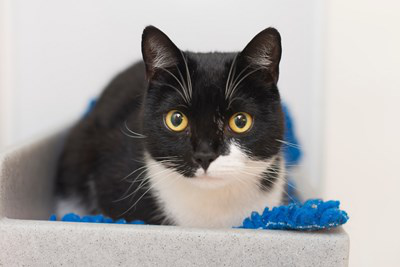

In [71]:
image = Image.open('cat.png')
display(image)

In [72]:
# # 확인용 코드
# print(image)
# print(T.ToTensor()(image))
# print(T.ToTensor()(image).shape[1])
# print(T.ToTensor()(image).shape[2])
# print(random.uniform(0.02, 0.4))
# print(random.uniform(0, 0.3))
# print((10.1 * 10)**(1/2))
# print((10.1 / 10)**(1/2))
# print(random.randint(0, 1))
# tensor = T.ToTensor()(image)
# print(tensor)
# tensor[0:100, 0:100] = 0
# print(tensor[0:100, 0:100])
# tensor[0:100, 0:100] = random.random()
# print(tensor[0:100, 0:100])
# # print(to_pil_image(tensor))

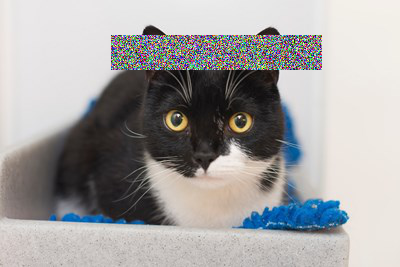

In [73]:
tensor = T.ToTensor()(image)
tensor = RandomErasing()(tensor)
output = T.ToPILImage()(tensor)
display(output)